In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.model_selection import train_test_split

In [3]:
data = pd.read_csv('uniprot links_2.csv')
data.head()


,DrugBank ID,Name,Type,UniProt ID,UniProt Name
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A


In [4]:
print(data.loc[data['UniProt ID'] == 'Q8DNV6'])

      DrugBank ID                                               Name  \
14349     DB06970  2-CHLORO-N-(3-CYANO-5,6-DIHYDRO-4H-CYCLOPENTA[...   

                    Type UniProt ID  \
14349  SmallMoleculeDrug     Q8DNV6   

                                            UniProt Name  
14349  UDP-N-acetylmuramoyl-tripeptide--D-alanyl-D-al...  


In [5]:
data.iloc[:,3].max()

'T1RTG8'

In [8]:
data=data.rename(columns={'UniProt ID': 'UniProtID'})

In [10]:
data=data.rename(columns={'DrugBank ID': 'DrugBankID'})

In [12]:
data=data.rename(columns={'UniProt Name': 'UniProtName'})

In [11]:
data[(data.UniProtID=="P01116")].DrugBankID

15316    DB07771
15339    DB07780
Name: DrugBankID, dtype: object

In [13]:
data.describe()

,DrugBankID,Name,Type,UniProtID,UniProtName
count,20061,20061,20061,20061,20061
unique,7370,7370,2,4763,4255
top,DB12010,Fostamatinib,SmallMoleculeDrug,P24941,Cyclin-dependent kinase 2
freq,306,306,19134,136,136


In [14]:
data.isnull().sum()

DrugBankID     0
Name           0
Type           0
UniProtID      0
UniProtName    0
dtype: int64

In [15]:
grouped=data.groupby(['DrugBankID']).count()
grouped.head()

,Name,Type,UniProtID,UniProtName
DrugBankID,,,,
DB00001,1,1,1,1
DB00002,12,12,12,12
DB00004,3,3,3,3
DB00005,14,14,14,14
DB00006,1,1,1,1


In [16]:
grouped['UniProtID'].mean()

2.7219810040705563

In [17]:
first100=grouped.sort_values('Name', ascending=False).head(100)
first100.head()

,Name,Type,UniProtID,UniProtName
DrugBankID,,,,
DB12010,306,306,306,306
DB11638,189,189,189,189
DB09130,147,147,147,147
DB00157,144,144,144,144
DB01593,124,124,124,124


(array([19., 27.,  4., 13.,  8.,  1.,  0.,  4.,  3.,  5.,  2.,  1.,  0.,
         1.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  3.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([ 22.  ,  24.84,  27.68,  30.52,  33.36,  36.2 ,  39.04,  41.88,
         44.72,  47.56,  50.4 ,  53.24,  56.08,  58.92,  61.76,  64.6 ,
         67.44,  70.28,  73.12,  75.96,  78.8 ,  81.64,  84.48,  87.32,
         90.16,  93.  ,  95.84,  98.68, 101.52, 104.36, 107.2 , 110.04,
        112.88, 115.72, 118.56, 121.4 , 124.24, 127.08, 129.92, 132.76,
        135.6 , 138.44, 141.28, 144.12, 146.96, 149.8 , 152.64, 155.48,
  

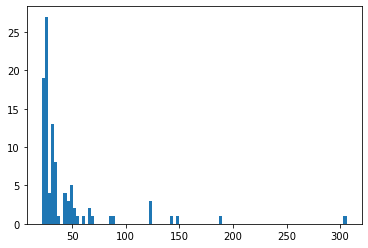

In [18]:
plt.hist(first100['Name'], bins=100)

(array([6.575e+03, 3.500e+02, 1.480e+02, 8.700e+01, 5.400e+01, 3.800e+01,
        1.900e+01, 3.400e+01, 1.100e+01, 8.000e+00, 1.200e+01, 5.000e+00,
        1.000e+00, 3.000e+00, 4.000e+00, 3.000e+00, 4.000e+00, 1.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 2.000e+00, 1.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 1.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+0

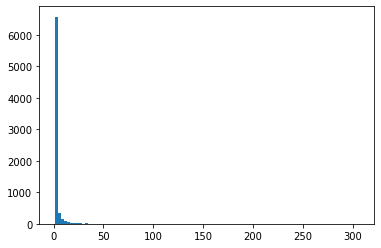

In [19]:
plt.hist(grouped['Name'], bins=100)

In [20]:
c= data.groupby(['UniProtID']).count()
c

,DrugBankID,Name,Type,UniProtName
UniProtID,,,,
A0A023W3H0,1,1,1,1
A0A0E1R3H3,1,1,1,1
A0A0H2UQB5,1,1,1,1
A0A0H2URW2,1,1,1,1
A0A0H2WWQ9,1,1,1,1
...,...,...,...,...
Q9ZIV5,3,3,3,3
Q9ZK53,1,1,1,1
Q9ZLT0,1,1,1,1


In [21]:
for name in set(data['UniProtName']):
    a=set(data.loc[data['UniProtName'] == name]['UniProtID'])
    if len(a) > 1:
        print(name,a)


Uracil-DNA glycosylase {'P13051', 'Q8X444', 'Q5SKC5', 'P10186'}
Cholesterol oxidase {'P22637', 'P12676'}
Oxygen-insensitive NAD(P)H nitroreductase {'P38489', 'Q01234'}
Neuraminidase {'P03474', 'P03472', 'P27907', 'P06820', 'P11485', 'P06818'}
Capsid scaffolding protein {'P03234', 'P16753'}
5-hydroxytryptamine receptor 2C {'P08909', 'P28335'}
30S ribosomal protein S9 {'P62669', 'P0A7X3', 'P80374'}
Envelope glycoprotein gp160 {'P12488', 'P35961', 'P05884'}
Thymidine kinase {'P06478', 'Q9QNF7', 'P03176', 'P24425', 'P0C0E6', 'P09250', 'Q9PPP5'}
Endo-1,4-beta-xylanase {'P40943', 'Q8RJN8', 'P09850', 'Q7SIE2'}
Shikimate dehydrogenase (NADP(+)) {'P43876', 'P15770'}
Thymidylate kinase {'P9WKE1', 'P23919', 'P0A721'}
D-galactose-binding periplasmic protein {'P23905', 'P0AEE5'}
Neocarzinostatin {'P0A3R9', 'P0A3S0'}
Beta-hexosaminidase {'P40406', 'Q9KU37'}
Glucose-6-phosphate 1-dehydrogenase {'P11411', 'P11413'}
Ferrochelatase {'P32396', 'Q7KZA3'}
Bacteriochlorophyll a protein {'P11741', 'Q46393'}


Holo-[acyl-carrier-protein] synthase {'P96618', 'P0A2W7'}
Methionine synthase {'P13009', 'Q99707'}
Enoyl-[acyl-carrier-protein] reductase [NADH] FabI {'O24990', 'P0AEK4'}
4-hydroxybenzoyl-CoA thioesterase {'P56653', 'Q04416'}
Deoxyuridine 5'-triphosphate nucleotidohydrolase {'P9WNS5', 'P06968'}
Adenylate cyclase {'O32393', 'P94182'}
Serine acetyltransferase {'P43886', 'Q0WKM4'}
Biphenyl-2,3-diol 1,2-dioxygenase {'P17297', 'P47228'}
DNA-directed RNA polymerase subunit beta' {'P0A8T7', 'Q8RQE8', 'P9WGY7'}
Dihydropteroate synthase {'P0AC13', 'P0C0X1', 'Q81VW8', 'P9WND1'}
Triosephosphate isomerase {'Q07412', 'P50921', 'P60174', 'P00943'}
p-hydroxybenzoate hydroxylase {'P20586', 'P00438'}
Cytochrome P450 {'Q83WG3', 'Q746J6'}
Non-heme chloroperoxidase {'O31158', 'O31168'}
Flavohemoprotein {'P24232', 'P39662'}
UDP-N-acetylenolpyruvoylglucosamine reductase {'P61432', 'P08373'}
S-ribosylhomocysteine lyase {'O34667', 'Q9RRU8'}
Cytochrome c3 {'P00132', 'P00137', 'Q9L915'}
Malate dehydrogenase {'P

In [22]:
dict1 = {}
counter = 1
for item in set(data['DrugBankID']):
    dict1[item] = counter
    counter += 1
print(dict1)

{'DB06880': 1, 'DB02078': 2, 'DB08049': 3, 'DB02828': 4, 'DB01420': 5, 'DB08473': 6, 'DB01571': 7, 'DB03510': 8, 'DB11823': 9, 'DB01113': 10, 'DB07249': 11, 'DB06681': 12, 'DB03181': 13, 'DB07142': 14, 'DB06828': 15, 'DB08071': 16, 'DB08848': 17, 'DB08995': 18, 'DB06210': 19, 'DB02540': 20, 'DB07490': 21, 'DB00368': 22, 'DB08704': 23, 'DB02429': 24, 'DB11753': 25, 'DB02282': 26, 'DB07225': 27, 'DB07113': 28, 'DB00373': 29, 'DB09300': 30, 'DB00732': 31, 'DB02403': 32, 'DB07003': 33, 'DB06594': 34, 'DB08046': 35, 'DB14068': 36, 'DB01018': 37, 'DB08702': 38, 'DB05888': 39, 'DB05630': 40, 'DB04205': 41, 'DB06589': 42, 'DB07665': 43, 'DB03279': 44, 'DB13949': 45, 'DB04795': 46, 'DB07744': 47, 'DB04152': 48, 'DB06909': 49, 'DB00652': 50, 'DB04577': 51, 'DB06910': 52, 'DB07667': 53, 'DB08906': 54, 'DB04064': 55, 'DB08689': 56, 'DB00182': 57, 'DB06614': 58, 'DB06240': 59, 'DB02158': 60, 'DB04221': 61, 'DB04786': 62, 'DB05540': 63, 'DB07677': 64, 'DB00778': 65, 'DB06196': 66, 'DB05020': 67, 'DB

In [23]:
data["DrugBankIDLabel"]=data["DrugBankID"].map(dict1) 
data.head()


,DrugBankID,Name,Type,UniProtID,UniProtName,DrugBankIDLabel
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,2875
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,318
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,318
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,318
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,318


In [24]:
dict2 = {}
counter2 = 1
for item in set(data['UniProtID']):
    dict2[item] = counter2
    counter2 += 1
print(dict2)

{'Q9Y5Y4': 1, 'P44469': 2, 'O95665': 3, 'P62669': 4, 'P77674': 5, 'P20292': 6, 'Q9Y5S8': 7, 'P19099': 8, 'Q12908': 9, 'Q8IB78': 10, 'Q9NY65': 11, 'P43702': 12, 'P03276': 13, 'P20645': 14, 'P42443': 15, 'O15379': 16, 'P04926': 17, 'P49915': 18, 'P01042': 19, 'O25323': 20, 'P0ABP8': 21, 'P25789': 22, 'Q9NY56': 23, 'Q49184': 24, 'Q99884': 25, 'P0A808': 26, 'P77390': 27, 'P13299': 28, 'Q51366': 29, 'Q5SKH7': 30, 'P0AE18': 31, 'P29376': 32, 'Q8TD08': 33, 'P53582': 34, 'P81605': 35, 'P15034': 36, 'B7JBP8': 37, 'Q18BX5': 38, 'P11586': 39, 'P47929': 40, 'P51957': 41, 'Q53H96': 42, 'Q56308': 43, 'Q9UBK8': 44, 'Q9H3N8': 45, 'Q86YV6': 46, 'Q16881': 47, 'P19652': 48, 'P08617': 49, 'P23528': 50, 'P09884': 51, 'P09850': 52, 'P16502': 53, 'P0A9M2': 54, 'P62344': 55, 'P11836': 56, 'P19821': 57, 'Q8IEM3': 58, 'P77150': 59, 'P37747': 60, 'Q13547': 61, 'P05327': 62, 'P17405': 63, 'O33199': 64, 'P13650': 65, 'Q8I0V4': 66, 'P23677': 67, 'Q9UKQ2': 68, 'Q9LAK3': 69, 'P20815': 70, 'O32393': 71, 'P06710': 72, 

In [25]:
print(list(dict1.keys())[list(dict1.values()).index(1)])

DB06880


In [26]:
print(list(dict2.keys())[list(dict2.values()).index(3020)])

P00395


In [27]:
data["UniProtIDLabel"]=data["UniProtID"].map(dict2) 
data.head()

,DrugBankID,Name,Type,UniProtID,UniProtName,DrugBankIDLabel,UniProtIDLabel
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,2875,3528
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,318,1907
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,318,4658
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,318,958
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,318,2199


In [28]:
data["Interaction"]=1
data.head()

,DrugBankID,Name,Type,UniProtID,UniProtName,DrugBankIDLabel,UniProtIDLabel,Interaction
0,DB00001,Lepirudin,BiotechDrug,P00734,Prothrombin,2875,3528,1
1,DB00002,Cetuximab,BiotechDrug,P00533,Epidermal growth factor receptor,318,1907,1
2,DB00002,Cetuximab,BiotechDrug,O75015,Low affinity immunoglobulin gamma Fc region re...,318,4658,1
3,DB00002,Cetuximab,BiotechDrug,P00736,Complement C1r subcomponent,318,958,1
4,DB00002,Cetuximab,BiotechDrug,P02745,Complement C1q subcomponent subunit A,318,2199,1


In [29]:
data1=data[["DrugBankIDLabel", "UniProtIDLabel","Interaction"]]
data1

,DrugBankIDLabel,UniProtIDLabel,Interaction
0,2875,3528,1
1,318,1907,1
2,318,4658,1
3,318,958,1
4,318,2199,1
...,...,...,...
20056,7209,2493,1
20057,7209,1758,1
20058,7209,1791,1
20059,874,2406,1


In [30]:
data1.to_csv('Interaction_positive only.csv', index=False)

In [31]:
data1["DrugBankIDLabel"].max()

7370

In [32]:
data1["UniProtIDLabel"].max()

4763

In [33]:
dict3 = {}
counter3=1
for i in range(20061):
    dict3[data1.iloc[i, 0], data1.iloc[i, 1]] = counter3
    counter3 += 1

dict3


{(2875, 3528): 1,
 (318, 1907): 2,
 (318, 4658): 3,
 (318, 958): 4,
 (318, 2199): 5,
 (318, 1713): 6,
 (318, 1063): 7,
 (318, 220): 8,
 (318, 4626): 9,
 (318, 2181): 10,
 (318, 158): 11,
 (318, 2145): 12,
 (318, 1448): 13,
 (5700, 4461): 14,
 (5700, 4569): 15,
 (5700, 240): 16,
 (5785, 3451): 17,
 (5785, 1392): 18,
 (5785, 2181): 19,
 (5785, 220): 20,
 (5785, 158): 21,
 (5785, 2145): 22,
 (5785, 1448): 23,
 (5785, 2021): 24,
 (5785, 4658): 25,
 (5785, 4626): 26,
 (5785, 958): 27,
 (5785, 2199): 28,
 (5785, 1713): 29,
 (5785, 1063): 30,
 (6133, 3528): 31,
 (75, 4138): 32,
 (4042, 2861): 33,
 (4042, 1806): 34,
 (7162, 3243): 35,
 (7162, 2990): 36,
 (7162, 665): 37,
 (7162, 2949): 38,
 (5688, 3256): 39,
 (810, 2861): 40,
 (810, 1806): 41,
 (1368, 105): 42,
 (3176, 3243): 43,
 (3176, 665): 44,
 (3176, 794): 45,
 (3176, 1960): 46,
 (3176, 2949): 47,
 (3176, 3274): 48,
 (3176, 413): 49,
 (3176, 1606): 50,
 (3176, 3254): 51,
 (3176, 2733): 52,
 (1399, 4229): 53,
 (1399, 4138): 54,
 (1276, 324

In [34]:
(4855,637) in dict3

False

In [35]:
import random
for i in range(30000):
    a=random.randint(1,7370)
    b=random.randint(1,4763)
    if (a,b) in dict3:
        continue
    data1.loc[20061+i]=[a,b,0]
data1

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


,DrugBankIDLabel,UniProtIDLabel,Interaction
0,2875,3528,1
1,318,1907,1
2,318,4658,1
3,318,958,1
4,318,2199,1
...,...,...,...
50056,3861,1339,0
50057,1760,3304,0
50058,2256,965,0
50059,6974,2557,0


In [36]:
data1.to_csv('interaction_negative and positive_30000.csv')

In [37]:
data1['Interaction'].replace(1, 5,inplace=True)
data1['Interaction'].replace(0, 1,inplace=True)
data1


/opt/anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:6786: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


,DrugBankIDLabel,UniProtIDLabel,Interaction
0,2875,3528,5
1,318,1907,5
2,318,4658,5
3,318,958,5
4,318,2199,5
...,...,...,...
50056,3861,1339,1
50057,1760,3304,1
50058,2256,965,1
50059,6974,2557,1


In [38]:
from sklearn.model_selection import train_test_split
train, test = train_test_split(data1, test_size = 0.3, random_state = 0)

In [39]:
train.to_csv('train2.txt',sep=' ',index=False,header=None)

In [40]:
test.to_csv('test2.txt',sep=' ',index=False,header=None)

In [41]:
data1.to_csv('interaction_negative and positive.csv')